In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
from utils.processUnit import *

In [2]:
data = pd.read_csv("All_GPUs.csv")
num_data = data.shape[0];
num_features = data.shape[1];

print(f"Number of samples: {num_data}")
print(f"num_features: {num_features}")

data.describe(include='all')

Number of samples: 3406
num_features: 34


,Architecture,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,...,Process,ROPs,Release_Date,Release_Price,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection
count,3344,2764,1446,3406,2656.000000,3392,3400,857.000000,2643.000000,3392,...,2943,2868,3406,556,3211,3406,3299.000000,2868.000000,2862,2648.000000
unique,704,17,223,296,NaN,2,22,NaN,NaN,2,...,14,42,774,168,20,2,NaN,NaN,315,NaN
top,Pascal P107,1920 x 1080,1050 MHz,\n-,NaN,Yes,DX 12.0,NaN,NaN,No,...,28nm,32,\n18-Apr-2017,$200.00,4096x2160,Yes,NaN,NaN,5 GTexel/s,NaN
freq,59,871,57,907,NaN,3018,1639,NaN,NaN,3018,...,1490,734,100,28,1330,1923,NaN,NaN,83,NaN
mean,NaN,NaN,NaN,NaN,1.355798,NaN,NaN,1.612602,0.842225,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.706032,69.382148,NaN,0.219033
std,NaN,NaN,NaN,NaN,0.718539,NaN,NaN,1.223497,0.478614,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.692516,54.431844,NaN,0.436769
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,24.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,56.000000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,104.000000,NaN,0.000000


In [3]:
feature_names = data.columns.tolist()
print(feature_names)

['Architecture', 'Best_Resolution', 'Boost_Clock', 'Core_Speed', 'DVI_Connection', 'Dedicated', 'Direct_X', 'DisplayPort_Connection', 'HDMI_Connection', 'Integrated', 'L2_Cache', 'Manufacturer', 'Max_Power', 'Memory', 'Memory_Bandwidth', 'Memory_Bus', 'Memory_Speed', 'Memory_Type', 'Name', 'Notebook_GPU', 'Open_GL', 'PSU', 'Pixel_Rate', 'Power_Connector', 'Process', 'ROPs', 'Release_Date', 'Release_Price', 'Resolution_WxH', 'SLI_Crossfire', 'Shader', 'TMUs', 'Texture_Rate', 'VGA_Connection']


In [4]:
split_resolution(data, 'Best_Resolution')
split_resolution(data, 'Resolution_WxH')
split_PSU(data, 'PSU')

erase_unit(data, 'Boost_Clock')
erase_unit(data, 'Core_Speed')
erase_unit(data, 'Max_Power')
erase_unit(data, 'Memory')
erase_unit(data, 'Memory_Bandwidth')
erase_unit(data, 'Memory_Bus')
erase_unit(data, 'Memory_Speed')
erase_unit(data, 'Pixel_Rate')
erase_unit(data, 'Process')
erase_unit(data, 'Release_Price')
erase_unit(data, 'Texture_Rate')

split_cores(data, 'L2_Cache', 'L2')
split_cores(data, 'ROPs', 'ROPs')

data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')

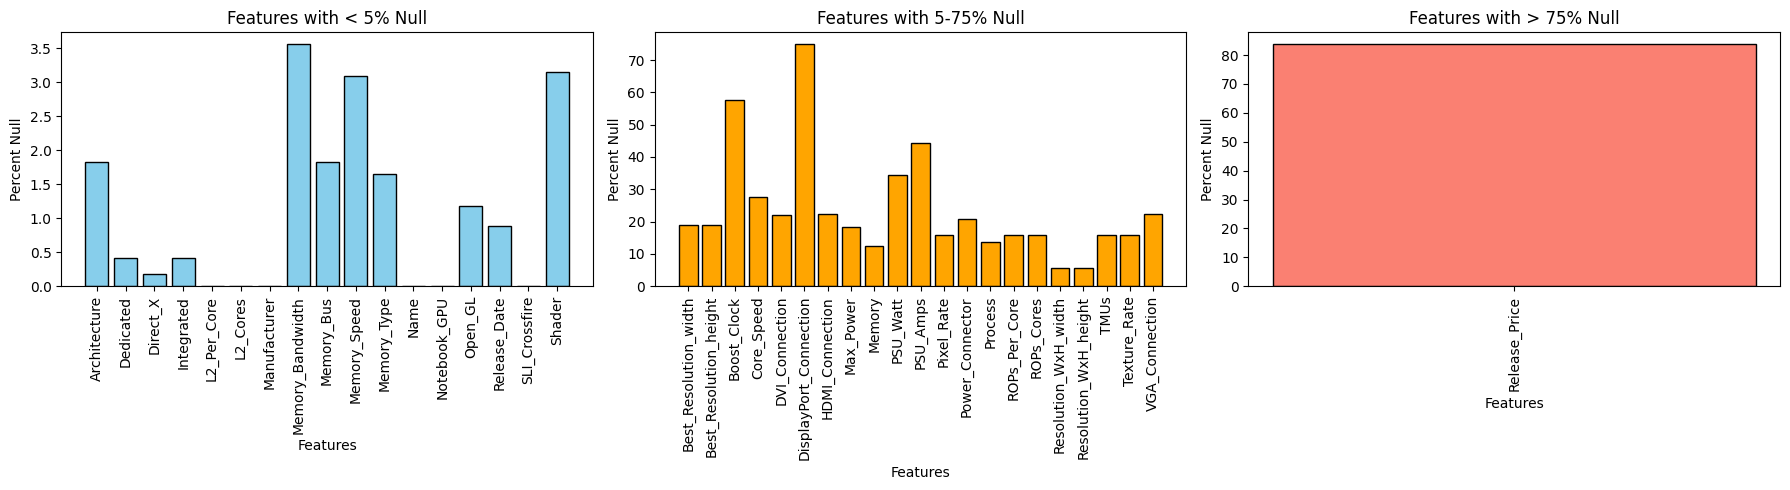

In [5]:
min_threshold = 5
max_threshold = 75

null_percent = data.isnull().mean() * 100

low_percent_null = null_percent[null_percent < min_threshold]
med_percent_null = null_percent[(null_percent >= min_threshold) & (null_percent <= max_threshold)]
high_percent_null = null_percent[null_percent > max_threshold]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(low_percent_null.index, low_percent_null, color='skyblue', edgecolor='black')
axes[0].set_title('Features with < 5% Null')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Percent Null')
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(med_percent_null.index, med_percent_null, color='orange', edgecolor='black')
axes[1].set_title('Features with 5-75% Null')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Percent Null')
axes[1].tick_params(axis='x', rotation=90)

axes[2].bar(high_percent_null.index, high_percent_null, color='salmon', edgecolor='black')
axes[2].set_title('Features with > 75% Null')
axes[2].set_xlabel('Features')
axes[2].set_ylabel('Percent Null')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [6]:
data = data.dropna(subset=low_percent_null.index)
for col in high_percent_null.index:
    data.pop(col)

In [7]:
print(med_percent_null.index)

Index(['Best_Resolution_width', 'Best_Resolution_height', 'Boost_Clock',
       'Core_Speed', 'DVI_Connection', 'DisplayPort_Connection',
       'HDMI_Connection', 'Max_Power', 'Memory', 'PSU_Watt', 'PSU_Amps',
       'Pixel_Rate', 'Power_Connector', 'Process', 'ROPs_Per_Core',
       'ROPs_Cores', 'Resolution_WxH_width', 'Resolution_WxH_height', 'TMUs',
       'Texture_Rate', 'VGA_Connection'],
      dtype='object')


In [8]:
med_num_replace = ['Best_Resolution_width', 'Best_Resolution_height', 'Boost_Clock', 'Core_Speed', 'Max_Power', 
               'Memory', 'PSU_Watt', 'PSU_Amps', 'Pixel_Rate', 'Process', 'ROPs_Per_Core', 'Resolution_WxH_width', 
               'Resolution_WxH_height', 'TMUs', 'Texture_Rate']

for col in med_num_replace:
    if data[col].skew() < 1:
        data[col] = data[col].fillna(data[col].mean())
    else:
        data[col] = data[col].fillna(data[col].median())
    
data['TMUs'] = data['TMUs'].round()

In [9]:
med_catagories_replace = ['DVI_Connection', 'DisplayPort_Connection', 'HDMI_Connection', 'Power_Connector', 'ROPs_Cores', 'VGA_Connection']
for col in med_catagories_replace:
    data[col] = data[col].fillna(data[col].mode()[0])

In [10]:
data.describe(include='all')

data.to_csv("clean_data.csv", index=False)

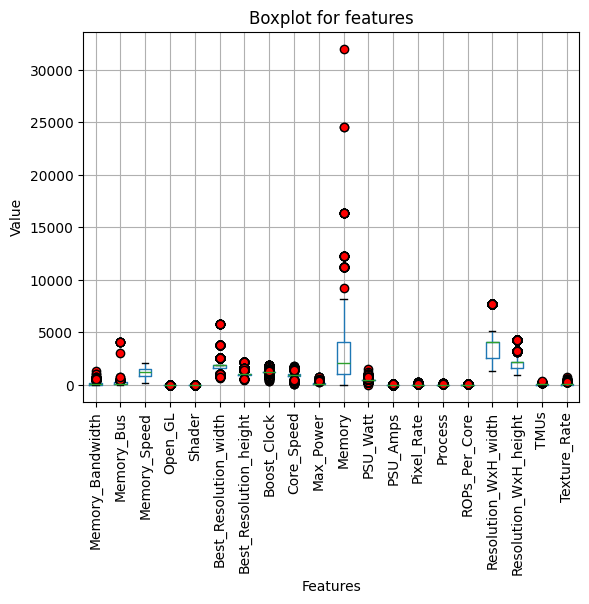

In [11]:
numerical_feature = ['Memory_Bandwidth', 'Memory_Bus', 'Memory_Speed', 'Open_GL', 'Shader','Best_Resolution_width', 'Best_Resolution_height', 'Boost_Clock', 'Core_Speed', 'Max_Power', 
               'Memory', 'PSU_Watt', 'PSU_Amps', 'Pixel_Rate', 'Process', 'ROPs_Per_Core', 'Resolution_WxH_width', 
               'Resolution_WxH_height', 'TMUs', 'Texture_Rate']

data[numerical_feature].boxplot(flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Boxplot for features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

for col in numerical_feature:
    Q_1 = data[col].quantile(0.25)
    Q_3 = data[col].quantile(0.75)
    IQR = Q_3 - Q_1
    lower_bound = Q_1 - 1.5 * IQR
    upper_bound = Q_3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [12]:
data.describe(include='all')

,Architecture,Best_Resolution_width,Best_Resolution_height,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,...,ROPs_Per_Core,ROPs_Cores,Release_Date,Resolution_WxH_width,Resolution_WxH_height,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection
count,883,883.000000,883.000000,883.000000,883.000000,883.000000,883,883,883.000000,883.000000,...,883.000000,883.0,883,883.000000,883.000000,883,883.0,883.000000,883.000000,883.000000
unique,213,NaN,NaN,NaN,NaN,NaN,2,7,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Kepler GK106-400-A1,NaN,NaN,NaN,NaN,NaN,Yes,DX 12.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
freq,27,NaN,NaN,NaN,NaN,NaN,828,627,NaN,NaN,...,NaN,873.0,NaN,NaN,NaN,618,NaN,NaN,NaN,NaN
mean,NaN,1675.889015,945.021518,1174.285121,892.367386,1.684032,NaN,NaN,2.636467,0.943375,...,20.510759,NaN,2012-07-03 22:02:34.926387200,3373.082673,1896.539071,NaN,5.0,51.342016,49.103058,0.157418
min,NaN,1280.000000,720.000000,980.000000,485.000000,0.000000,NaN,NaN,0.000000,0.000000,...,1.000000,NaN,2009-09-30 00:00:00,1600.000000,900.000000,NaN,5.0,1.000000,1.000000,0.000000
25%,NaN,1600.000000,900.000000,1198.980952,800.000000,1.000000,NaN,NaN,3.000000,1.000000,...,16.000000,NaN,2011-04-19 00:00:00,2560.000000,1600.000000,NaN,5.0,32.000000,25.000000,0.000000
50%,NaN,1600.000000,900.000000,1198.980952,936.000000,2.000000,NaN,NaN,3.000000,1.000000,...,16.000000,NaN,2012-06-01 00:00:00,4096.000000,2160.000000,NaN,5.0,48.000000,45.000000,0.000000
75%,NaN,1920.000000,1080.000000,1198.980952,1000.000000,2.000000,NaN,NaN,3.000000,1.000000,...,32.000000,NaN,2013-06-02 00:00:00,4096.000000,2160.000000,NaN,5.0,64.000000,64.000000,0.000000
max,NaN,1920.000000,1080.000000,1300.000000,1215.000000,4.000000,NaN,NaN,3.000000,2.000000,...,48.000000,NaN,2016-08-08 00:00:00,5120.000000,2880.000000,NaN,5.0,112.000000,124.000000,1.000000


In [13]:
data_mean = data[numerical_feature].mean().round(4)
data_variance = data[numerical_feature].var().round(4)
data_std = data[numerical_feature].std().round(4)

stat_data = pd.DataFrame({
    "Feature": numerical_feature,
    "Mean": data_mean,
    "Variance": data_variance,
    "Standard": data_std
})

stat_data.set_index('Feature', inplace=True)
stat_data.to_csv("stats.csv", index=True)

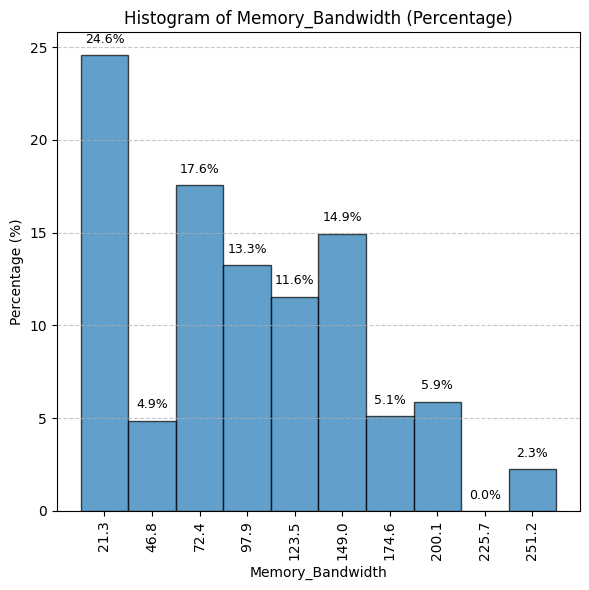

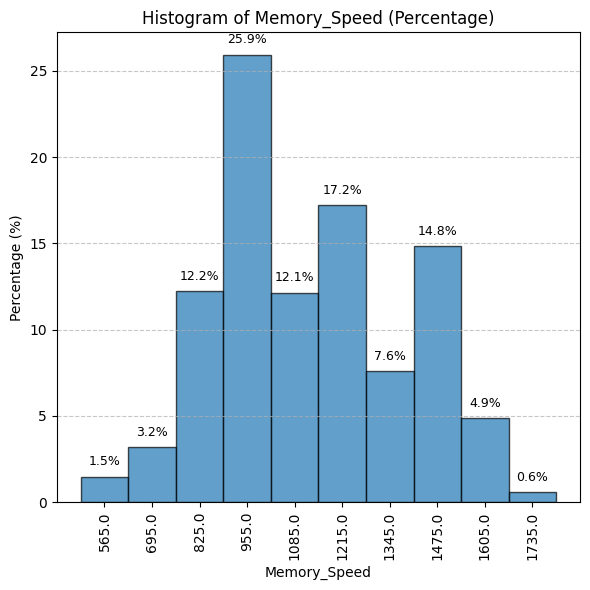

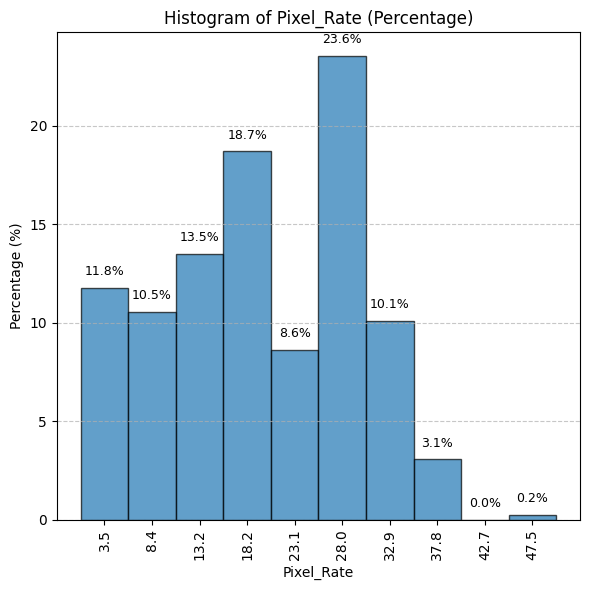

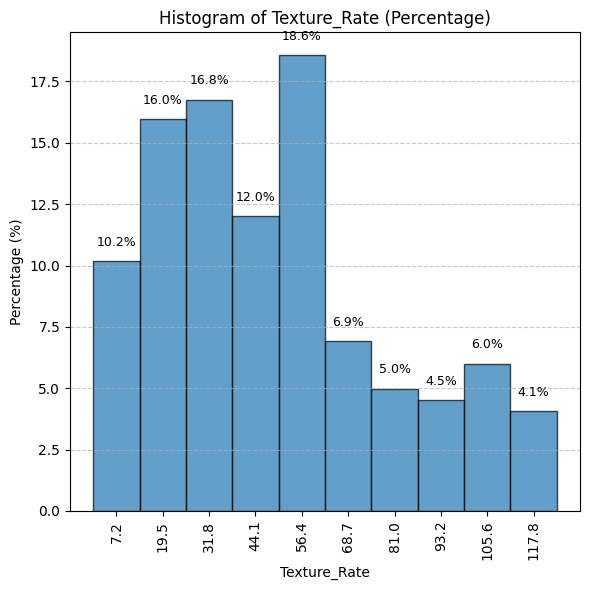

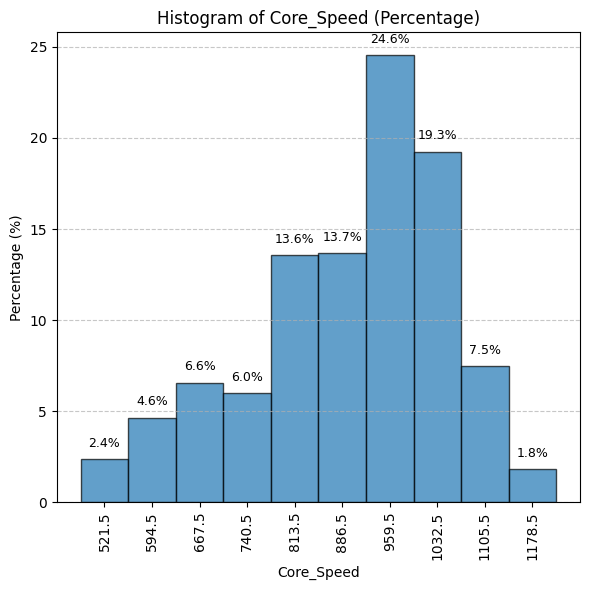

In [14]:
important_feature = ['Memory_Bandwidth', 'Memory_Speed', 'Pixel_Rate', 'Texture_Rate', 'Core_Speed']
for column in important_feature:
    plt.figure(figsize=(6, 6))  
    counts, bins, patches = plt.hist(data[column], bins=10, weights=[100/len(data[column])] * len(data[column]),
                                     edgecolor='black', alpha=0.7)

    for i in range(len(patches)):
        plt.text((bins[i] + bins[i+1]) / 2, counts[i] + 0.5,  
                 f'{counts[i]:.1f}%', ha='center', va='bottom', fontsize=9)


    bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]
    plt.xticks(bin_centers, [f'{center:.1f}' for center in bin_centers], rotation=90) 

    plt.title(f'Histogram of {column} (Percentage)')
    plt.xlabel(column)
    plt.ylabel('Percentage (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  
    plt.show()


In [15]:
# plt.figure(figsize=(10, 6))

# plt.scatter(data['Best_Resolution_width'], data['Best_Resolution_height'], color='blue', label='Best Resolution', alpha=0.5, edgecolor='k')

# plt.scatter(data['Resolution_WxH_width'], data['Resolution_WxH_height'], color='red', label='Resolution', alpha=0.5, edgecolor='k')

# plt.title('Comparison between Best Resolution and Resolution')
# plt.xlabel('Width')
# plt.ylabel('Height')
# plt.legend()
# plt.grid(True)
# plt.show()

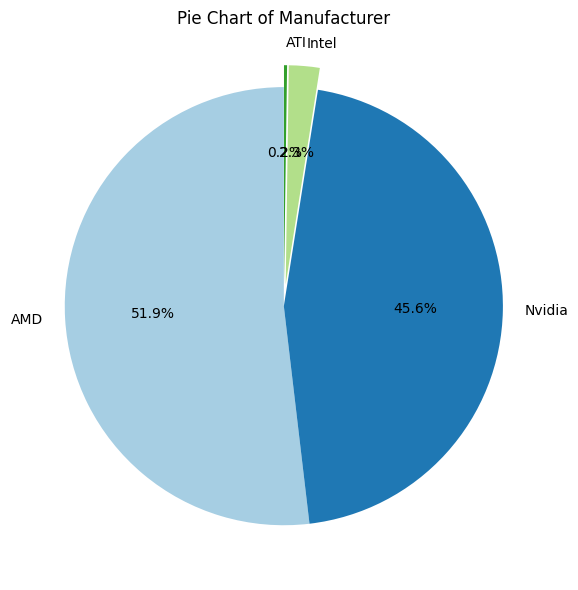

In [16]:
plt.figure(figsize=(6, 6))

# Tách các phần nhỏ (explode) và điều chỉnh khoảng cách nhãn
explode = [0.1 if val < 5 else 0 for val in data['Manufacturer'].value_counts(normalize=True) * 100]  # Tách các phần <5%
data['Manufacturer'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    explode=explode,  # Tách các phần nhỏ
    labeldistance=1.1,  # Khoảng cách nhãn
    textprops={'fontsize': 10}  # Kích thước chữ
)

plt.title('Pie Chart of Manufacturer')
plt.ylabel('')
plt.tight_layout()
plt.show()


## Ước lượng giá trị trung bình của các tham số

In [17]:
n_samples = len(data)
confidence = 0.95
for feature in important_feature:
    df = data[feature]
    mean_sample = np.mean(df)
    se = stats.sem(df)
    h = se * stats.t.ppf((1 + confidence) / 2., n_samples - 1)

    print(f"{feature}")
    print(f"Mean: {mean_sample:.2f}")
    print(f"confidence interval 95%: ({mean_sample - h :.2f}, {mean_sample + h :.2f})")

Memory_Bandwidth
Mean: 96.71
confidence interval 95%: (92.81, 100.61)
Memory_Speed
Mean: 1130.45
confidence interval 95%: (1112.50, 1148.40)
Pixel_Rate
Mean: 19.22
confidence interval 95%: (18.56, 19.87)
Texture_Rate
Mean: 49.10
confidence interval 95%: (47.06, 51.14)
Core_Speed
Mean: 892.37
confidence interval 95%: (882.65, 902.09)


## Kiểm định 1 phía

In [23]:
mu = 1130.45 
t_statistic, p_value_two_tailed = stats.ttest_1samp(data['Memory_Speed'], mu)

if t_statistic < 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

print(f"T-statistic: {t_statistic}")
print(f"P-value (one-tailed): {p_value_one_tailed}")

alpha = 0.05
if p_value_one_tailed < alpha:
    print("Kết luận: Từ chối giả thuyết không H₀.")
    print("Có đủ bằng chứng thống kê để kết luận rằng tốc độ bộ nhớ trung bình của GPU nhỏ hơn 1130.45.")
else:
    print("Kết luận: Không đủ bằng chứng để từ chối giả thuyết không H₀.")
    print("Không thể kết luận rằng tốc độ bộ nhớ trung bình của GPU nhỏ hơn 1130.45.")

T-statistic: 0.0002043323461156595
P-value (one-tailed): 0.5000814937091583
Kết luận: Không đủ bằng chứng để từ chối giả thuyết không H₀.
Không thể kết luận rằng tốc độ bộ nhớ trung bình của GPU nhỏ hơn 1130.45.


# Kiểm định phân phối chuẩn

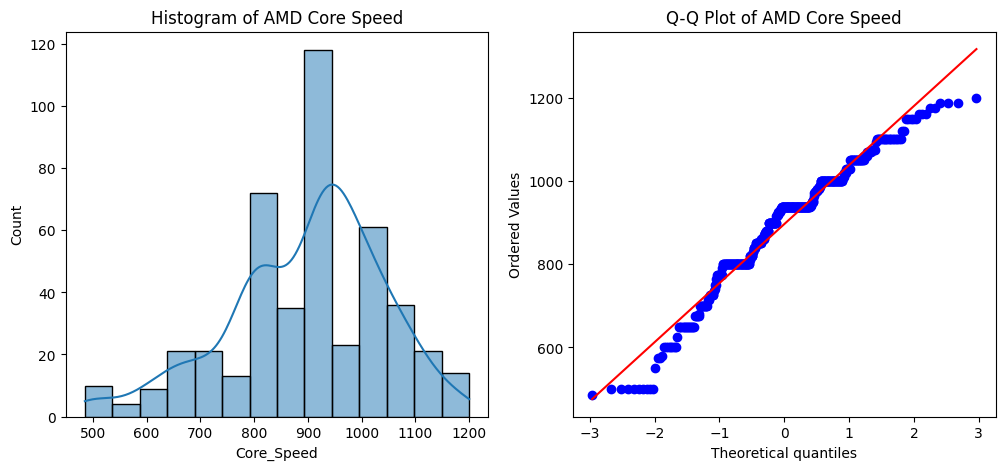

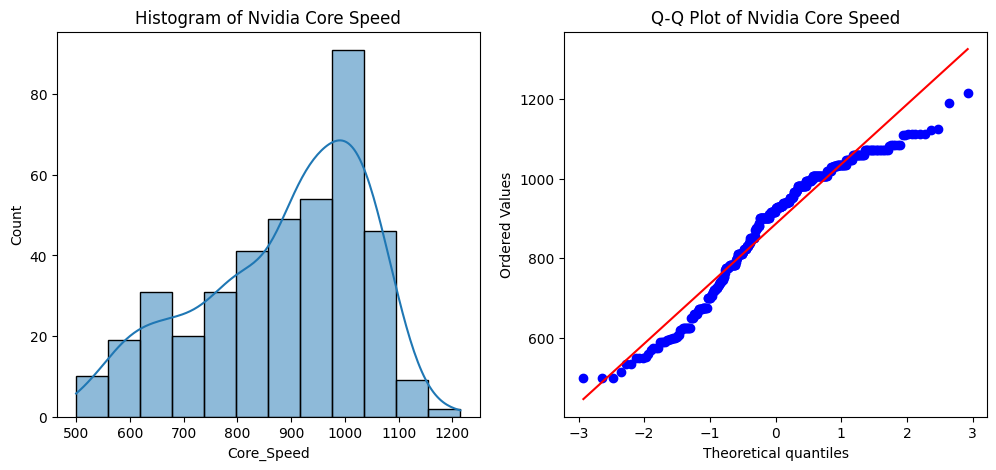

In [28]:
import seaborn as sns
amd_data = data[data['Manufacturer'] == 'AMD']['Core_Speed']
nvidia_data = data[data['Manufacturer'] == 'Nvidia']['Core_Speed']

def check_normality(data, title):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {title}')
    
    # Q-Q Plot
    plt.subplot(1,2,2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {title}')
    
    plt.show()

check_normality(amd_data, 'AMD Core Speed')
check_normality(nvidia_data, 'Nvidia Core Speed')

In [ ]:
w_stat_amd, p_value_amd = stats.shapiro(amd_data)
w_stat_nvidia, p_value_nvidia = stats.shapiro(nvidia_data)

print(f"AMD Shapiro-Wilk Test: W={w_stat_amd:.4f}, p-value={p_value_amd:.4f}")
print(f"Nvidia Shapiro-Wilk Test: W={w_stat_nvidia:.4f}, p-value={p_value_nvidia:.4f}")

alpha = 0.05

if p_value_amd > alpha:
    print("Không từ chối H₀ cho AMD: Dữ liệu AMD có thể được coi là phân phối chuẩn.")
else:
    print("Từ chối H₀ cho AMD: Dữ liệu AMD không phải là phân phối chuẩn.")

if p_value_nvidia > alpha:
    print("Không từ chối H₀ cho Nvidia: Dữ liệu Nvidia có thể được coi là phân phối chuẩn.")
else:
    print("Từ chối H₀ cho Nvidia: Dữ liệu Nvidia không phải là phân phối chuẩn.")

AMD Shapiro-Wilk Test: W=0.9654, p-value=0.0000
Nvidia Shapiro-Wilk Test: W=0.9447, p-value=0.0000
Từ chối H₀ cho AMD: Dữ liệu AMD không phải là phân phối chuẩn.
Từ chối H₀ cho Nvidia: Dữ liệu Nvidia không phải là phân phối chuẩn.


In [38]:
stat, p = stats.mannwhitneyu(amd_data, nvidia_data, alternative='two-sided')
print(p) 
alpha = 0.05
if p > alpha:
    print('Không có sự khác biệt đáng kể (Không từ chối H0)')
else:
    print('Có sự khác biệt đáng kể (Từ chối H0)')

0.7581786965221745
Không có sự khác biệt đáng kể (Không từ chối H0)


## Anova

In [58]:
amd_data = data[data['Manufacturer'] == 'AMD']['Memory_Speed']
nvidia_data = data[data['Manufacturer'] == 'Nvidia']['Memory_Speed']

print(amd_data.var())
print(nvidia_data.var())

70146.27422051923
74789.31754379468


In [ ]:
stat, p = stats.levene(amd_data, nvidia_data)

0.07152270234179366

In [ ]:
groups = [amd_data, nvidia_data]

n = sum(len(group) for group in groups)  
k = 2

overall_mean = np.mean([value for group in groups for value in group])

group_means = [np.mean(group) for group in groups]

SSB = sum(len(group) * (mean - overall_mean)**2 for group, mean in zip(groups, group_means))
SSW = sum(sum((value - mean)**2 for value in group) for group, mean in zip(groups, group_means))
SST = SSB + SSW

df_between = k - 1
df_within = n - k

MSB = SSB / df_between
MSW = SSW / df_within

F = MSB / MSW


f_stat, p_value = stats.f_oneway(amd_data, nvidia_data)

print("Chi tiết ANOVA:")
print(f"Tổng số quan sát: {n}")
print(f"Số nhóm: {k}")
print(f"Trung bình tổng thể: {overall_mean:.2f}")
print(f"Trung bình từng nhóm: {[round(mean, 2) for mean in group_means]}")
print(f"SSB (Between Groups Sum of Squares): {SSB:.2f}")
print(f"SSW (Within Groups Sum of Squares): {SSW:.2f}")
print(f"SST (Total Sum of Squares): {SST:.2f}")
print(f"df_between (Độ tự do giữa nhóm): {df_between}")
print(f"df_within (Độ tự do trong nhóm): {df_within}")
print(f"MSB (Mean Square Between): {MSB:.2f}")
print(f"MSW (Mean Square Within): {MSW:.2f}")
print(f"F-statistic (Tính tay): {F:.2f}")
print(f"F-statistic (f_oneway): {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Chi tiết ANOVA:
Tổng số quan sát: 861
Số nhóm: 2
Trung bình tổng thể: 1136.69
Trung bình từng nhóm: [1141.82, 1130.86]
SSB (Between Groups Sum of Squares): 25773.61
SSW (Within Groups Sum of Squares): 62122152.97
SST (Total Sum of Squares): 62147926.58
df_between (Độ tự do giữa nhóm): 1
df_within (Độ tự do trong nhóm): 859
MSB (Mean Square Between): 25773.61
MSW (Mean Square Within): 72319.15
F-statistic (Tính tay): 0.36
F-statistic (f_oneway): 0.36
p-value: 0.5507


## Hồi quy tuyến tính đơn

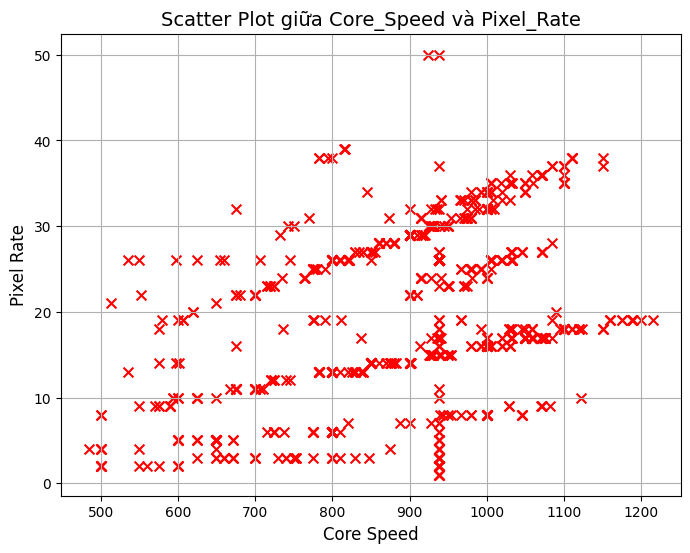

In [74]:
pixel_rate = data['Pixel_Rate']
core_speed = data['Core_Speed']

plt.figure(figsize=(8, 6))
plt.scatter(core_speed, pixel_rate, color='red', marker='x', s=50)  

# Tùy chỉnh biểu đồ
plt.title("Scatter Plot giữa Core_Speed và Pixel_Rate", fontsize=14)
plt.xlabel("Core Speed", fontsize=12)
plt.ylabel("Pixel Rate", fontsize=12)
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [ ]:
import statsmodels.api as sm

core_speed = sm.add_constant(core_speed)

model = sm.OLS(pixel_rate, core_speed).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Pixel_Rate   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           7.89e-38
Time:                        12:41:12   Log-Likelihood:                -3198.1
No. Observations:                 883   AIC:                             6400.
Df Residuals:                     881   BIC:                             6410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7419      1.875     -3.062      0.0

In [78]:
rss = sum(model.resid)
rss

-1.4493295452666644e-11

In [19]:
# compare_fre = ['DVI_Connection', 'Direct_X', 'DisplayPort_Connection', 'HDMI_Connection', 
#                'L2_Cores', 'Memory_Type', 'Power_Connector', 'ROPs_Cores', 'VGA_Connection']

# fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Lưới 3x3 cho 9 feature
# axes = axes.flatten()

# for i, col in enumerate(compare_fre):
#     # Đếm tần suất các giá trị trong cột và tính phần trăm
#     counts = data[col].value_counts(normalize=True) * 100  # Tính phần trăm
#     # Chuyển các nhãn thành chuỗi để đảm bảo kiểu dữ liệu đồng nhất
#     labels = counts.index.astype(str)
    
#     # Vẽ biểu đồ thanh ngang
#     axes[i].barh(labels, counts.values, color='skyblue', edgecolor='black')
#     axes[i].set_title(f'Distribution of {col}')
#     axes[i].set_xlabel('Percentage (%)')
    
#     # Thêm phần trăm trên từng thanh
#     for j, value in enumerate(counts.values):
#         axes[i].text(value + 0.5, j, f'{value:.1f}%', va='center')  # In phần trăm phía cuối mỗi thanh

# # Điều chỉnh khoảng cách giữa các biểu đồ
# plt.tight_layout()
# plt.show()

In [20]:
# performance_features = ['Boost_Clock', 'Core_Speed', 'Max_Power', 
#                         'Memory', 'Memory_Bandwidth', 'Memory_Speed', 
#                         'Pixel_Rate', 'Shader', 'Texture_Rate', 
#                         'ROPs_Cores', 'TMUs']

# data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')
# data['Year'] = data['Release_Date'].dt.year

# for feature in performance_features:
#     data[feature] = pd.to_numeric(data[feature], errors='coerce')

# filtered_data = data[data['Manufacturer'].isin(['AMD', 'Nvidia', 'Intel'])]

# average_performance = filtered_data.groupby(['Manufacturer', 'Year'])[performance_features].mean().reset_index()

# plt.figure(figsize=(18, 12))
# for i, feature in enumerate(performance_features, 1):
#     plt.subplot(4, 3, i)
#     for manufacturer in ['AMD', 'Nvidia', 'Intel']:
#         subset = average_performance[average_performance['Manufacturer'] == manufacturer]
#         plt.plot(subset['Year'], subset[feature], label=manufacturer)
#     plt.title(f'Trend of {feature} Over Time')
#     plt.xlabel('Year')
#     plt.ylabel(feature)
#     plt.legend()

# plt.tight_layout()
# plt.show()

In [21]:
# filtered_data = data[data['Manufacturer'].isin(['AMD', 'Nvidia', 'Intel'])]


# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(filtered_data[performance_features])  


# pca = PCA(n_components=2)  
# pca_components = pca.fit_transform(scaled_features)


# pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
# pca_df['Manufacturer'] = filtered_data['Manufacturer'].values


# plt.figure(figsize=(10, 6))
# for manufacturer, color in zip(['AMD', 'Nvidia', 'Intel'], ['red', 'blue', 'green']):
#     subset = pca_df[pca_df['Manufacturer'] == manufacturer]
#     plt.scatter(subset['PC1'], subset['PC2'], label=manufacturer, alpha=0.7, color=color, edgecolor='k')

# plt.title('PCA Comparison of GPU Performance between AMD, Nvidia, and Intel')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.grid(True)
# plt.show()